# Housing Price Prediction Linear Regression
# Submitted by Harsh Srivastava
# 117CS0755

## importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## loading the training dataset

In [2]:
train_dataset_path = None
for root, dirs, files in os.walk(".", topdown=False) :
    for name in files:
        if name.endswith('train.csv') :
            train_dataset_path = os.path.join(root, name)
            break
    if train_dataset_path != None :
        break
        
train_dataset = pd.read_csv(train_dataset_path)
train_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## independent variable and dependent variables

In [3]:
X = train_dataset.iloc[:, 1:-1]

tot_size = X.shape[0]
print(X.shape)
X

(1460, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [4]:
y = train_dataset['SalePrice'].values
y.shape

(1460,)

## removing columns with more than 50 percent NA values

In [5]:
X_drop_NA = X.dropna(axis = 1, thresh = (0.5 * tot_size))
X_drop_NA

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


In [6]:
X_drop_NA.mean()

MSSubClass          56.897260
LotFrontage         70.049958
LotArea          10516.828082
OverallQual          6.099315
OverallCond          5.575342
YearBuilt         1971.267808
YearRemodAdd      1984.865753
MasVnrArea         103.685262
BsmtFinSF1         443.639726
BsmtFinSF2          46.549315
BsmtUnfSF          567.240411
TotalBsmtSF       1057.429452
1stFlrSF          1162.626712
2ndFlrSF           346.992466
LowQualFinSF         5.844521
GrLivArea         1515.463699
BsmtFullBath         0.425342
BsmtHalfBath         0.057534
FullBath             1.565068
HalfBath             0.382877
BedroomAbvGr         2.866438
KitchenAbvGr         1.046575
TotRmsAbvGrd         6.517808
Fireplaces           0.613014
GarageYrBlt       1978.506164
GarageCars           1.767123
GarageArea         472.980137
WoodDeckSF          94.244521
OpenPorchSF         46.660274
EnclosedPorch       21.954110
3SsnPorch            3.409589
ScreenPorch         15.060959
PoolArea             2.758904
MiscVal   

## Replacing NA values

In [7]:
X_fill = X_drop_NA.fillna(X_drop_NA.mean())
X_fill

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


## removing columns with only a single value in all rows

In [8]:
for col in X_fill.columns:
    if len(X_fill[col].unique()) == 1:
        X_fill.drop(col,inplace=True,axis=1)
        
X_fill

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


## adding a column of ones

In [9]:
X_fill = pd.concat([pd.Series(1, index=X_fill.index, name='ones'), X_fill], axis=1)
X_fill

,ones,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,1,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,1,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,1,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,112,0,0,0,0,4,2010,WD,Normal


## One Hot Encoding the dataframe

In [10]:
X_one_hot = pd.get_dummies(X_fill)
X_one_hot

,ones,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,1,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,1,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,1,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,1,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


## normalizing the columns

In [11]:
X_norm = X_one_hot / X_one_hot.max()
X_norm

,ones,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,0.315789,0.207668,0.039258,0.7,0.555556,0.996517,0.996517,0.122500,0.125089,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.105263,0.255591,0.044600,0.6,0.888889,0.983085,0.983085,0.000000,0.173281,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.315789,0.217252,0.052266,0.7,0.555556,0.995522,0.996020,0.101250,0.086109,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.368421,0.191693,0.044368,0.7,0.555556,0.952736,0.980100,0.000000,0.038271,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.315789,0.268371,0.066250,0.8,0.555556,0.995025,0.995025,0.218750,0.116052,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,0.315789,0.198083,0.036781,0.6,0.555556,0.994527,0.995025,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1.0,0.105263,0.271565,0.061209,0.6,0.666667,0.984080,0.989055,0.074375,0.139972,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1.0,0.368421,0.210863,0.042008,0.7,1.000000,0.965672,0.998010,0.000000,0.048724,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1.0,0.105263,0.217252,0.045144,0.5,0.666667,0.970149,0.993035,0.000000,0.008682,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## splitting train and test data again

In [12]:
train_size = int(tot_size * 0.8)
test_size = tot_size - train_size

X_train = X_norm.iloc[0: train_size, :]
X_test = X_norm.iloc[train_size: tot_size, :]
y_train = y[0: train_size]
y_test = y[train_size: tot_size]

In [13]:
X_train

,ones,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,0.315789,0.207668,0.039258,0.7,0.555556,0.996517,0.996517,0.12250,0.125089,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.105263,0.255591,0.044600,0.6,0.888889,0.983085,0.983085,0.00000,0.173281,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.315789,0.217252,0.052266,0.7,0.555556,0.995522,0.996020,0.10125,0.086109,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.368421,0.191693,0.044368,0.7,0.555556,0.952736,0.980100,0.00000,0.038271,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.315789,0.268371,0.066250,0.8,0.555556,0.995025,0.995025,0.21875,0.116052,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1.0,0.473684,0.191693,0.059932,0.4,0.444444,0.979602,0.979602,0.00000,0.212261,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1164,1.0,0.421053,0.223802,0.075063,0.5,0.777778,0.984080,0.984080,0.00000,0.120482,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1165,1.0,0.105263,0.252396,0.044326,0.7,0.555556,0.999502,0.999502,0.16750,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1166,1.0,0.105263,0.204473,0.048665,0.8,0.555556,0.999005,0.999005,0.04500,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
X_train_np = X_train.to_numpy()
X_train_np

array([[1.        , 0.31578947, 0.20766773, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.10526316, 0.25559105, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.31578947, 0.2172524 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.10526316, 0.25239617, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.10526316, 0.20447284, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.31578947, 0.18530351, ..., 0.        , 1.        ,
        0.        ]])

In [15]:
X_test

,ones,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1168,1.0,0.368421,0.383387,0.063778,0.6,0.777778,0.962687,0.988060,0.000000,0.110914,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1169,1.0,0.315789,0.376997,0.166136,1.0,0.555556,0.992537,0.993035,0.861250,0.245748,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1170,1.0,0.421053,0.242812,0.045901,0.6,0.666667,0.983582,0.983582,0.000000,0.092488,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1171,1.0,0.105263,0.242812,0.042370,0.6,0.666667,0.974129,0.974129,0.000000,0.117293,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1172,1.0,0.842105,0.111821,0.018662,0.7,0.555556,0.998010,0.998507,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,0.315789,0.198083,0.036781,0.6,0.555556,0.994527,0.995025,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,1.0,0.105263,0.271565,0.061209,0.6,0.666667,0.984080,0.989055,0.074375,0.139972,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,1.0,0.368421,0.210863,0.042008,0.7,1.000000,0.965672,0.998010,0.000000,0.048724,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1.0,0.105263,0.217252,0.045144,0.5,0.666667,0.970149,0.993035,0.000000,0.008682,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
X_test_np = X_test.to_numpy()
X_test_np

array([[1.        , 0.36842105, 0.38338658, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.31578947, 0.37699681, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.42105263, 0.2428115 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.36842105, 0.21086262, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.10526316, 0.2172524 , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.10526316, 0.23961661, ..., 0.        , 1.        ,
        0.        ]])

In [17]:
print(y_train)
print(y_test)

[208500 181500 223500 ... 233170 245350 173000]
[235000 625000 171000 163000 171900 200500 239000 285000 119500 115000
 154900  93000 250000 392500 745000 120000 186700 104900  95000 262000
 195000 189000 168000 174000 125000 165000 158000 176000 219210 144000
 178000 148000 116050 197900 117000 213000 153500 271900 107000 200000
 140000 290000 189000 164000 113000 145000 134500 125000 112000 229456
  80500  91500 115000 134000 143000 137900 184000 145000 214000 147000
 367294 127000 190000 132500 101800 142000 130000 138887 175500 195000
 142500 265900 224900 248328 170000 465000 230000 178000 186500 169900
 129500 119000 244000 171750 130000 294000 165400 127500 301500  99900
 190000 151000 181000 128900 161500 180500 181000 183900 122000 378500
 381000 144000 260000 185750 137000 177000 139000 137000 162000 197900
 237000  68400 227000 180000 150500 139000 169000 132500 143000 190000
 278000 281000 180500 119500 107500 162900 115000 138500 155000 140000
 160000 154000 225000 177500 

## Calculating parameters

In [18]:
B = np.dot(np.dot(np.linalg.pinv(np.dot(X_train_np.T, X_train_np)), X_train_np.T), y_train)
B

array([ 1.14984115e+05, -1.19468905e+04,  2.23632175e+04,  1.43975678e+05,
        6.22517575e+04,  4.93432859e+04,  5.84231316e+05,  2.69478922e+05,
        2.93739933e+04,  9.21150529e+04,  1.55228244e+04, -2.73151475e+03,
        8.77900464e+04,  1.21767955e+05,  6.03182982e+04,  4.90137765e+02,
        1.23391155e+05,  3.72960798e+03,  4.32626808e+02,  1.69333368e+04,
        3.74503895e+03, -3.84116839e+04, -5.20541135e+04,  4.48647349e+04,
        1.93005503e+04, -7.24667411e+04,  3.75823024e+03,  3.51454691e+04,
        1.29333327e+04, -4.48175446e+03,  5.26531655e+03,  9.04729853e+03,
        2.07149800e+04, -1.21913319e+04,  1.06347259e+04, -8.74773575e+03,
       -1.65521873e+06,  4.00454512e+02,  3.01482857e+04,  2.82312707e+04,
        3.04870108e+04,  2.57170901e+04,  4.31770874e+04,  7.18070270e+04,
        2.43860499e+04,  2.78774789e+04,  3.58379152e+04,  2.68826661e+04,
        2.67384006e+04,  3.30896953e+04,  2.18754992e+04,  3.32805159e+04,
        7.45834317e+04,  

## predicting for Test dataset

In [19]:
y_pred = np.dot(X_test, B)
y_pred

array([210947.4909753 , 480609.01991827, 128304.61711888, 161166.44024062,
       157588.26485076, 267682.06976307, 228703.03552421, 323621.24219173,
       113633.30033833, 109301.8781949 , 129216.25857178,  84717.01422022,
       224385.30509416, 302912.64931474, 491622.57075511, 149190.74711262,
       192830.54796897, 118588.12610955,  70558.71723295, 268968.94994475,
       181935.16908547, 191340.59838642, 188878.00782165, 172676.66694686,
       137329.18081188, 154853.48312179, 153594.28846108, 167800.95002185,
       230819.18497634, 129641.8117546 , 174261.66664885, 140903.74465343,
        85810.53085437, 197416.70559078, 138298.9288699 , 193009.87750846,
       140887.87261058, 261413.94100972, 129244.89465975, 216273.55409547,
       140576.35071882, 311009.81792994, 204109.56352344, 196660.68118667,
        67122.84173962, 147440.52347524, 120395.33336576, 111360.49676115,
       106073.91587242, 242466.72320594,  84566.72329952, 108112.64053032,
        93418.45053108, 1

## RMSE value

In [20]:
RMSE = np.sqrt(np.sum((y_test - y_pred) ** 2) / test_size)
RMSE

46437.27365761077

## Plotting actual vs predicted values

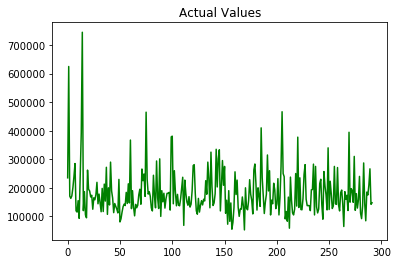

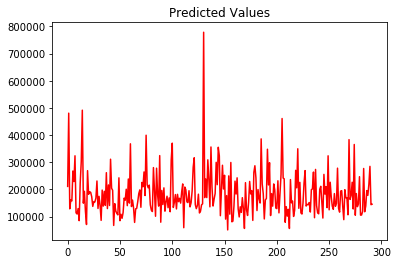

In [27]:
plt.figure()
plt.title('Actual Values')
plt.plot(list(range(0, test_size)), y_test, color='green')

plt.figure()
plt.title('Predicted Values')
plt.plot(list(range(0, test_size)), y_pred, label = '', color='red')
plt.show()